In [1]:
import numpy as np
import apogee.tools.read as apread
from matplotlib import pyplot as plt
import pandas as pd
import csv
from apogee.tools import bitmask
import math
from astropy.io import fits

In [2]:
def calcR(x,pm):
    ccfCenter = max(x)
    primary = np.where(x == ccfCenter)
    peak_loc = primary[0][0]
    #print("primary loc = " + str(peak_loc))
    if peak_loc < pm: 
        pm = peak_loc
    if peak_loc > 401 - pm:
        pm = 401 - peak_loc
    if peak_loc == 0:
        r = 0
        return r 
        
    #print(pm)
    endpoint = peak_loc+pm
    startpoint= peak_loc-pm
    Mirror = (x[peak_loc:endpoint])[::-1]
    sigmaA = np.sqrt(1.0 / (2.0 * len(Mirror)) * np.sum((x[startpoint:peak_loc] - Mirror)**2))
    #print("a = "+ str(sigmaA))
    r = np.max(x) / (np.sqrt(2.0) * sigmaA)
    #print(r)
    return r
    

### Notes:
    The calls to calculate R had to be reduced by a value of 1. This is because the reflected array and the other half of the array were reported to have two different sizes therefore could not be boradcasted together. We will either need to justify this or seek the issue that caused the two to be of varying lengths in the first place.
    Find locations where the array start point is less than zero or places where it will exceed 401. 

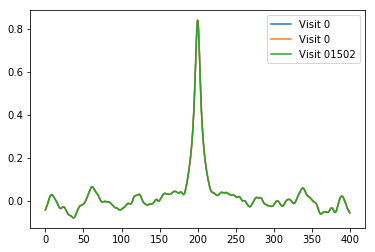

--Visit 0--


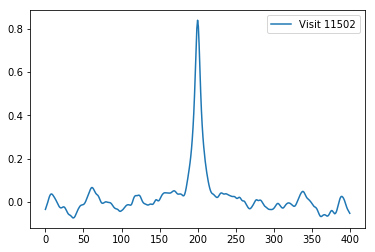

--Visit 1--


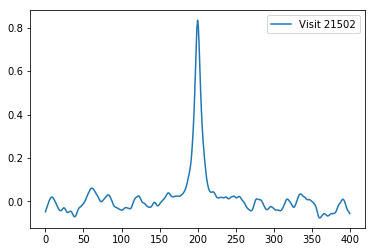

--Visit 2--


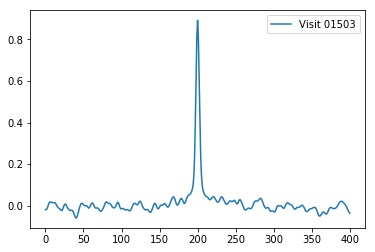

--Visit 0--


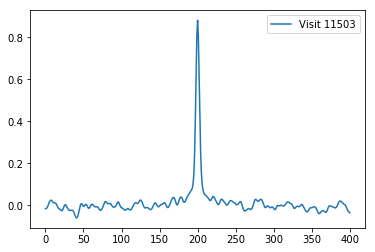

--Visit 1--


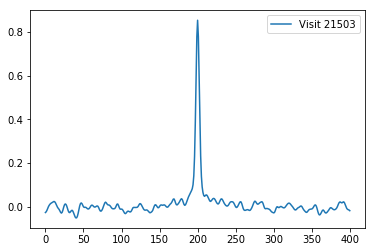

--Visit 2--


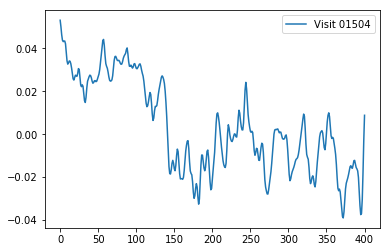

--Visit 0--


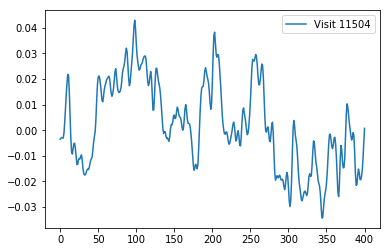

--Visit 1--


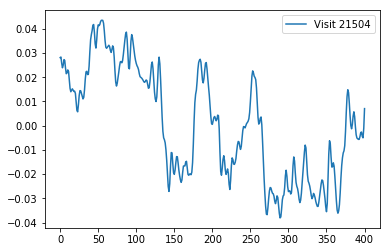

--Visit 2--


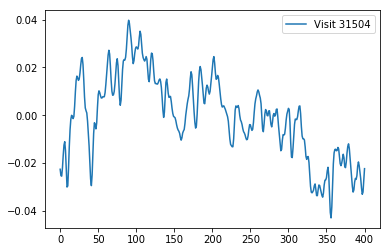

--Visit 3--


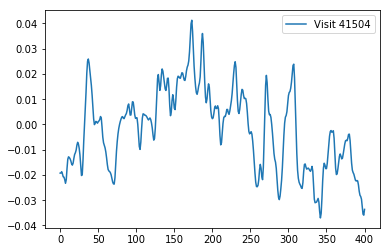

--Visit 4--


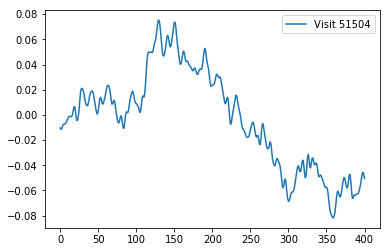

--Visit 5--


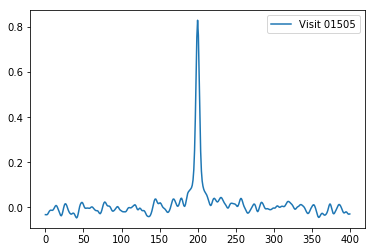

--Visit 0--


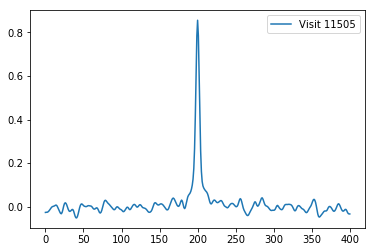

--Visit 1--


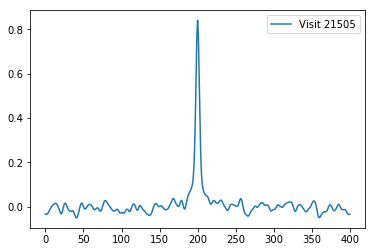

--Visit 2--


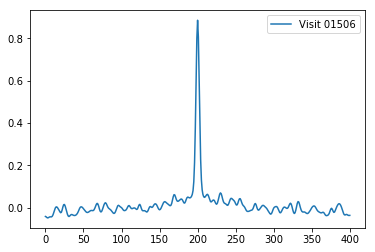

--Visit 0--


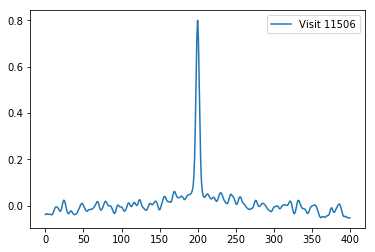

--Visit 1--


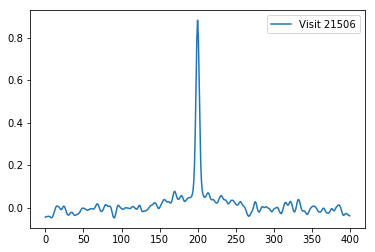

--Visit 2--


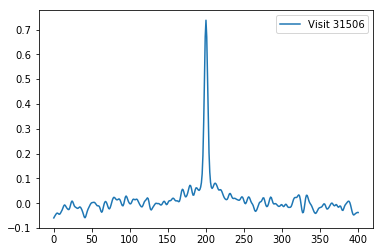

--Visit 3--


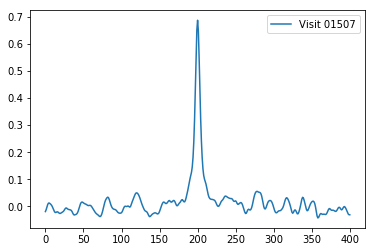

--Visit 0--


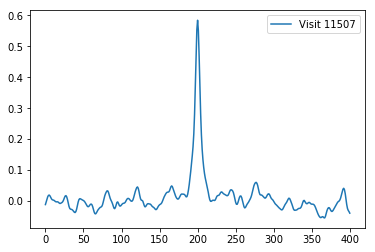

--Visit 1--


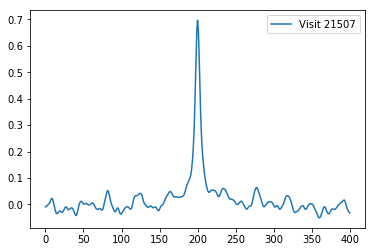

--Visit 2--


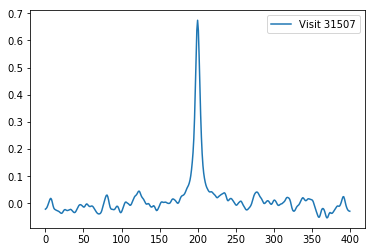

--Visit 3--


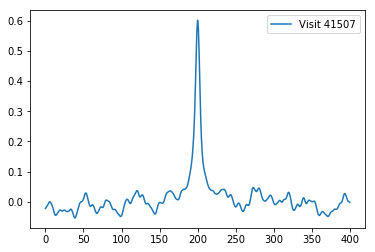

--Visit 4--


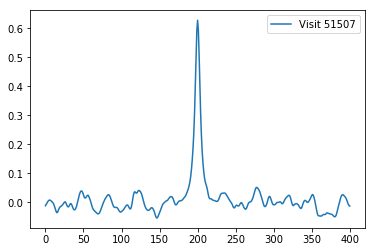

--Visit 5--


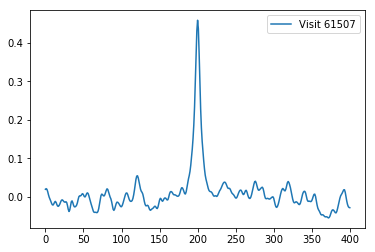

--Visit 6--


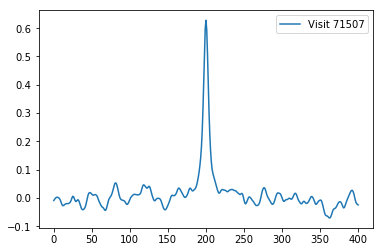

--Visit 7--


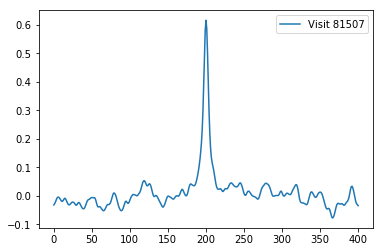

--Visit 8--


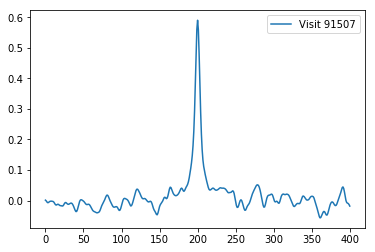

--Visit 9--


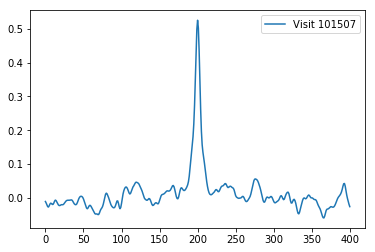

--Visit 10--


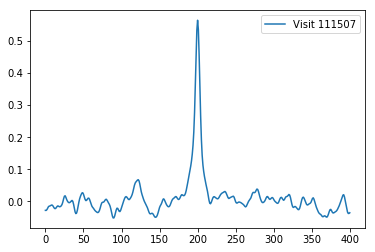

--Visit 11--


In [22]:
import os.path
from pathlib import Path

#for i in range(len(locationIDs)):
for i in range(1502,1508):
    locationID = locationIDs[i]
    apogeeID = apogeeIDs[i]
    #print(i,locationID,apogeeID)
    my_file = Path('/Volumes/coveydata/APOGEE_Spectra/APOGEE2_DR14/dr14/apogee/spectro/redux/r8/stars/apo25m/'+str(locationID)+'/'+'apStar-r8-'+str(apogeeID)+'.fits')
    #if my_file.is_file():
        #path = '/Volumes/coveydata-5/APOGEE_Spectra/APOGEE2_DR14/dr14/apogee/spectro/redux/r8/stars/apo25m/'+str(locationID)+'/'+'apStar-r8-'+str(apogeeID)+'.fits'
    try: 
        path = '/Volumes/coveydata/APOGEE_Spectra/APOGEE2_DR14/dr14/apogee/spectro/redux/r8/stars/apo25m/'+str(locationID)+'/'+'apStar-r8-'+str(apogeeID)+'.fits'
        #print(path) 
    
    except:
        path = '/Volumes/coveydata/APOGEE_Spectra/APOGEE2_DR14/dr14/apogee/spectro/redux/r8/stars/apo25m/'+str(locationID)+'/'+'apStarC-r8-'+str(apogeeID)+'.fits'
        #print(path)
        
    data = fits.open(path)
    point = data[9]
    xccf = point.data[0][32]
    CCF = point.data[0][27]
    HDU0 = fits.getheader(path,0)
    nvisits = HDU0['NVISITS']
    for visit in range(0,nvisits):
        if nvisits != 1:
            ccf = CCF[visit+2]
            plt.plot(ccf,label='Visit '+str(visit)+str(i))
            plt.legend(loc='upper right')
            plt.show()
            nonzeroes = np.count_nonzero(ccf) # This condition is meant to eliminate visits that are empty
            if nonzeroes >= 1:
                bs_pt = bisector(xccf, ccf)
                x_range = xrange(bs_pt[0])
                print('--Visit '+str(visit)+'--')
                R151 = calcR(ccf,75)
                R101 = calcR(ccf,50)
                R51 = calcR(ccf,25)
                Ratios = r_ratio(R51,R151,R101)
                r1 = Ratios[0]
                r2 = Ratios[1]
                    #print(r1,r2)
        

In [3]:
def bisector(xccf,yccf):
    height = max(yccf) - min(yccf)
    slices = height/4.0
    bounds = np.arange(min(yccf),height,slices)
    if len(bounds) != 0:
        z1 = (bounds[0] + bounds[1])/2.0
        z2 = (bounds[1] + bounds[2])/2.0
        z3 = (bounds[2] + bounds[3])/2.0
        z4 = (bounds[3] + bounds[4])/2.0
        y_bisector = np.array([z1,z2,z3,z4])

        x_bisector = []
        x0 = []
        x1 = []
        x2 = []
        x3 = []
        for i in range(len(yccf)):
            if yccf[i] <= bounds[4] and yccf[i] > bounds[3]:
                x0.append(xccf[i])
        x_0 = (np.mean(x0))
        x_bisector.append(x_0)

        i = 0
        for i in range(len(yccf)):
            if yccf[i] <= bounds[3] and yccf[i] >= bounds[2]:
                x1.append(xccf[i])
        x_1=(np.mean(x1))
        x_bisector.append(x_1)

        i = 0
        for i in range(len(yccf)):
            if yccf[i] <= bounds[2] and yccf[i] >= bounds[1]:
                x2.append(xccf[i])
        x_2=(np.mean(x2))
        x_bisector.append(x_2)

        i = 0
        for i in range(len(yccf)):
            if yccf[i] <= bounds[1] and yccf[i] >= bounds[0]:
                x3.append(xccf[i])
        x_3=(np.mean(x3))
        x_bisector.append(x_3)

        bisector_pts = np.vstack([x_bisector,y_bisector])
        #print(bisector_pts)
        return(bisector_pts)
    #else:
        #x_bisector = 0.0
        #y_bisector = 0.0
        #error = np.vstack([x_bisector,y_bisector])
        return(error)

In [4]:
def xrange(x_bisector):
    #print(x_bisector)
    xr = max(x_bisector) - min(x_bisector)
    return xr

In [6]:
'''
This function was being used for finding the width of a CCF by locating the maxima, find the midpoint (y-direction),
and take the difference in lag space (x-direction) of the indicides that told where the sides of the CCF was.
The later steps still need to be implimented. 
'''
def FindMaxima(xccf,CCF,peak_loc):
    thresh_down = 1
    if peak_loc > 7:
        peak_low = peak_loc-2
    else:
        peak_low = peak_loc+1
    while thresh_down > 0:
        if peak_low > 2 and (CCF[peak_low-1] - CCF[peak_low] < 0) and CCF[peak_low-1] > 0:
            peak_low = peak_loc-1
        else:
            thresh_down = 0
    thresh_up = 1
    if peak_loc < 394:
        peak_high = peak_loc+2
    else:
        peak_high = peak_loc-1
    while thresh_up > 0:
        if peak_high < 399 and (CCF[peak_high+1] - CCF[peak_high] < 0) and (CCF[peak_high+1] > 0):
            peak_high = peak_high+1
        else:
            thresh_up = 0
    n_lag = np.arange(0,402,1)
    walk = np.zeroes(n_lag)
    
'''    if peak_low < 0:
        peak_low = 0
    if else peak_high > n_lag-1:
        peak_high = n_lag-1
        
    walk[peak_low:peak_high] = 1''';
    
    
    

## Notes

We will need to save r151, r101, r401 and r401 as arrays that contain these values for all visits of a given star. From each visit, we need to find the smallest r values. Additionally, we will need to find the largest max x-range.


In [5]:
#Calculate the R-ratios for the likely_binary function
def r_ratio(r51,r151,r101):
        if r51!=0 and r151!=0 and r101!=0:
            r1_ratio = r151/r101
            r2_ratio = r101/r51
            R1_ratio = math.log10(r1_ratio)
            R2_ratio = math.log10(r2_ratio)
            ratios = [round(R1_ratio,3),round(R2_ratio,3)]
        else:
            ratios = ["N/A","N/A"]
        return ratios

In [6]:
#def idSB2s(CCF,xr,r51,r151,r101): # cuts to identify SB2s
    #min_r51 = min(r51)
    #min_r101 = min(r101)
    #min_r151 = min(r151)
    #peak_401 = max(CCF) - min(CCF)
    #max_xr = max(xr)
def idSB2s(R1_ratio, R2_ratio,r51,r151,r101,xr): # cuts to identify SB2s from Kevin's IDL Routine
    min_r51 = r51
    min_r101 = r101
    min_r151 = r151
    r1_ratio = R1_ratio
    r2_ratio = R2_ratio
    max_xr = xr
    
    likely_sb2s = np.where((math.log10(r1_ratio) > 0.06 and (math.log10(r1_ratio) < 0.13 and 
                            math.log10(min_r101) < 0.83)) or (math.log10(r2_ratio) > 0.05 and 
                            math.log10(r2_ratio) < 0.02 and math.log10(min_r51) < 0.83) and
                            math.log10(min_r51) > 0.25 and math.log10(min_r101) > 0.22 and
                            math.log10(peak_401) > -0.5 and math.log10(max_xr) < 2.3 and 
                            math.log10(max_xr) > 0.7
                          )
    return likely_sb2s

In [7]:
from astropy.io import fits

In [8]:
allStarDR14 = apread.allStar(rmcommissioning=False,main=False,ak=True,akvers='targ',adddist=False)
locationIDs = allStarDR14['LOCATION_ID']
apogeeIDs = allStarDR14['APOGEE_ID']
apogeeIDs = [s.decode('utf-8') for s in apogeeIDs]

--Visit 0--
30.9921455868
20.405690916
16.8107365529
11.9395452568


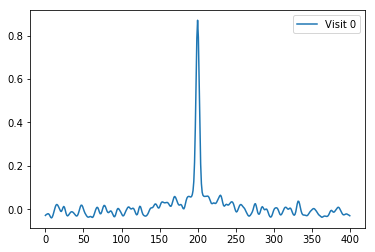

--Visit 1--
28.8214357988
18.6966915109
15.3947869215
11.0821340579


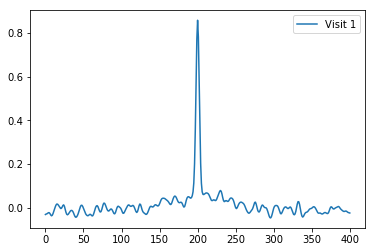

--Visit 2--
30.0986007812
19.852141112
16.4504989308
11.7812567462


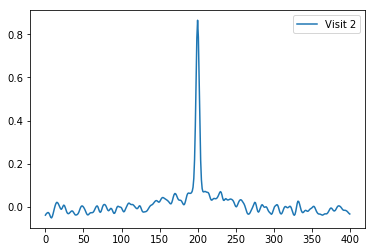

In [59]:
### Note: This will be used to test if the new R function is working appropriately
for i in range(1):
        locationID = locationIDs[i]
        apogeeID = apogeeIDs[i]
        path = '/Volumes/coveydata-5/APOGEE_Spectra/APOGEE2_DR14/dr14/apogee/spectro/redux/r8/stars/apo25m/'+str(locationID)+'/'+'apStar-r8-'+str(apogeeID)+'.fits'
        if len(path) == 129:
            data = fits.open(path)
            point = data[9]
            xccf = point.data[0][32]
            CCF = point.data[0][27]
            HDU0 = fits.getheader(path,0)
            nvisits = HDU0['NVISITS']
            for visit in range(0,nvisits):
                #snr = HDU0['SNVIS'+str(visit+2)]
                if nvisits != 1:
                    ccf = CCF[visit+2]
                    nonzeroes = np.count_nonzero(ccf) # This condition is meant to eliminate visits that are empty
                    if nonzeroes >= 1:
                        bs_pt = bisector(xccf, ccf)
                        x_range = xrange(bs_pt[0])
                        print('--Visit '+str(visit)+'--')
                        R401 = calcR(ccf,0,400)
                        R151 = calcR(ccf,125,275)
                        R101 = calcR(ccf,150,250)
                        R51 = calcR(ccf,175,225)
                        Ratios = r_ratio(R51,R151,R101)
                        r1 = Ratios[0]
                        r2 = Ratios[1]
                        plt.plot(ccf,label='Visit '+str(visit))
                        plt.legend(loc='upper right')
                        plt.show()

### NOTE: The below cell is the original code/main routine

In [19]:
#xccf = np.arange(0,402,1)

with open('DR14_Stats_Catalog.csv','w') as output:
    column = ['Location_ID','Apogee_ID','x_range','R51','R101','R151','R401','R151/R101','R101/R51','Visit']
    writer = csv.DictWriter(output,delimiter='\t',fieldnames=column)
    writer.writeheader()
    
    for i in range(len(locationIDs)):
        locationID = locationIDs[i]
        apogeeID = apogeeIDs[i]
        path = '/Volumes/coveydata-5/APOGEE_Spectra/APOGEE2_DR14/dr14/apogee/spectro/redux/r8/stars/apo25m/'+str(locationID)+'/'+'apStar-r8-'+str(apogeeID)+'.fits'
        #print(len(path))
        if len(path) == 129:
            data = fits.open(path)
            point = data[9]
            xccf = point.data[0][32]
            CCF = point.data[0][27]
            HDU0 = fits.getheader(path,0)
            nvisits = HDU0['NVISITS']
            for visit in range(0,nvisits):
                #snr = HDU0['SNVIS'+str(visit+2)]
                if nvisits != 1:
                    ccf = CCF[visit+2]
                    nonzeroes = np.count_nonzero(ccf) # This condition is meant to eliminate visits that are empty
                    if nonzeroes >= 1:
                        bs_pt = bisector(xccf, ccf)
                        x_range = xrange(bs_pt[0])
                        R401 = calcR401(ccf)
                        R151 = calcR151(ccf)
                        R101 = calcR101(ccf)
                        R51 = calcR51(ccf)
                        Ratios = r_ratio(R51,R151,R101)
                        r1 = Ratios[0]
                        r2 = Ratios[1]
                        # Output file onto CoveyData Server. Name: DR14_Stats_Catalog.csv 
                        # This file will hold all the stats for every visit for each star in DR14.
                        #Path: /Volumes/CoveyData-4/APOGEE_Spectra/APOGEE_DR14/BinaryID/
                        writer.writerow({'Location_ID':locationID,'Apogee_ID':apogeeID,'x_range':round(x_range,3),
                                         'R51':round(R51,3),'R101':round(R101,3),'R151':round(R151,3),
                                         'R401':round(R401,3),'R151/R101':r1,'R101/R51':r2,'Visit':visit})
        else:
            path = '/Volumes/coveydata-5/APOGEE_Spectra/APOGEE2_DR14/dr14/apogee/spectro/redux/r8/stars/apo25m/'+str(locationID)+'/'+'apStarC-r8-'+str(apogeeID)+'.fits'
            data = fits.open(path)
            print('I am apStarC file!')
            point = data[9]
            xccf = point.data[0][32]
            CCF = point.data[0][27]
            HDU = fits.getheader(path,0)
            nvisits = HDU0['NVISITS']
            for visit in range(0,nvisits):
                #snr = HDU['SNVIS'+str(visit+2)]
                if nvisits != 1:
                    ccfs = CCF[visit+2]
                    nonzero = np.count_nonzero(ccfs)
                    if nonzero >= 1:
                        bs_pt = bisector(xccf, ccfs)
                        x_range = xrange(bs_pt[0])
                        R401 = calcR401(ccfs)
                        R151 = calcR151(ccfs)
                        R101 = calcR101(ccfs)
                        R51 = calcR51(ccfs)
                        Ratios = r_ratio(R51,R151,R101)
                        r1 = Ratios[0]
                        r2 = Ratios[1]
                        writer.writerow({'Location_ID':locationID,'Apogee_ID':apogeeID,'x_range':round(x_range,3),
                                         'R51':round(R51,3),'R101':round(R101,3),'R151':round(R151,3),
                                         'R401':round(R401,3),'R151/R101':r1,'R101/R51':r2,'Visit':visit})       



FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/coveydata-4/APOGEE_Spectra/APOGEE2_DR14/dr14/apogee/spectro/redux/r8/stars/apo25m/4126/apStar-r8-2M12382107-0720490.fits'

In [ ]:
# Read in the file and find how many are SB2s. 
stats = pd.read_csv('DR14_Stats_Catalog.csv',delimiter='/t')
FieldID = stats['Location_ID']
TwoMassID = stats['Apogee_ID']
Star_Visit = stats['Visit']
logR1 = stats['R151/R101']
logR2 = stats['R101/R51']
R51s = stats['R51']
R101s = stats['R101']
R151s = stats['R151']
xr_value = stats['x_range']

with open('DR14_SB2_Catalog.csv','w') as files:
    column = ['Location_ID','Apogee_ID']
    writer = csv.DictWriter(files,delimiter='\t',fieldnames=column)
    writer.writeheader()
    i = 0
    r1 = []
    r2 = []
    r51 = []
    r101 = []
    r151 = []
    xranges = []
    SB2 = []
    for i in range(len(FieldID)):
        if Visit[i] == Visit[i]:
            r1.append(logR1[i])
            r2.append(logR2[i])
            r51.append(R51s[i])
            r101.append(R101s[i])
            r151.append(R151s[i])
            xranges.append(xr_value[i])
        likely_binary = likely_SB2s(r1, r2,r51,r151,r101,xranges)
        index_locID = FieldID[likely_binary]
        index_apoID = TwoMassID[likely_binary]
        SB2.append([index_locID,index_apoID])
        writer.writerow({'Location_ID': SB2[0] ,'Apogee_ID':SB2[1]})

In [ ]:
#Check that these are true SB2s visually! Open the file of SB2s and plot the CCFs
Sb2_data = pd.read_csv('DR14_SB2_Catalog.csv',delimiter='/t')
locIds = Sb2_data['Location_ID']
apoIds = Sb2_data['Apogee_ID']

for j in range(len(apoIds)):
    location_ID = locIds[j]
    apogee_ID = apoIds[j]
    header = apread.apStar(location_ID,apogee_ID,ext=0,header=True)
    data = apread.apStar(location_ID,apogee_ID,ext=9,header=False)
    nvisits=header[1]['NVISITS']
    
    for visit in range(nvisits):
        if nvisits != 1:
            CCF = data['CCF'][0][2+visit]
            plt.title(str(location_ID)+str(apogee_ID))
            plt.plot(CCF+visit,label='Visit '+ str(visit))
            plt.xlabel('CCF Lag',fontsize=10)
            plt.ylabel('$\widehat{CCF}$ Units', fontsize=10)
            plt.legend(loc='upper right')
            #plt.savefig('PSB2Fig_'+str(location_ID)+'-'+str(apogee_ID)+'-'+str(visit)+'.png',dpi=900)
            #plt.xlim(100,300)
            #plt.show()
            #plt.close('all')
                    
        else:
            CCF = data['CCF'][0]
    #except FileNotFoundError:
            #pass
    

## Issue: 
Current array for R values is being over written. It will find the min but then suddenly skip to an empty array. It must be the main programs for loop!

Additionally, Something is wrong with the bisector x-value calculations. They are in decimal values instead of whole integers. The code below is less precise than the one above

In [ ]:
# Main Routine
xccf = np.arange(0,402,1)
with open('SB2_Catalog.csv','w') as output:
    names = ['Location_ID','Apogee_ID','R_401','R_151','R_101','R_51','Max_XR','Visit']
    writer = csv.DictWriter(output,delimiter='\t',fieldnames=names)
    writer.writeheader()
    #try:
    for i in range(20):
            location_ID = locationIDs[i]
            apogee_ID = apogeeIDs[i]
            header = apread.apStar(location_ID,apogee_ID,ext=0,header=True)
            data = apread.apStar(location_ID,apogee_ID,ext=9,header=False)
            nvisits=header[1]['NVISITS']
            #R151 = array_builder(location_ID,apogee_ID,nvisits)
            XR = []
            for visit in range(nvisits):
                if nvisits != 1:
                    CCF = data['CCF'][0][2+visit]
                    bs_pts = bisector(xccf,CCF)
                    x_range = xrange(bs_pts[0])
                    print(x_range)
                    R401 = calcR401(CCF)
                    R151 = calcR151(CCF)
                    R101 = calcR101(CCF)
                    R51 = calcR51(CCF)
                    XR.append(x_range)
                    writer.writerow({'Location_ID':location_ID,'Apogee_ID':apogee_ID,'R_401':round(R401,3)
                                 ,'R_151':round(R151,3),'R_101':round(R101,3),'R_51':round(R51,3),
                                     'Max_XR':round(max(XR),3), 'Visit':visit})
                                     #'Max_XR':round(x_range,3), 'Visit':visit})
                    #plt.plot(CCF,label=str(apogee_ID))
                    #plt.legend(loc='upper right')
                    #plt.xlim(100,300)
                    #plt.show()
                    
                else:
                    CCF = data['CCF'][0]
                #writer.writerow({'Location_ID':location_ID,'Apogee_ID':apogee_ID,'R_401':round(R401,3)
                                 #,'R_151':round(R151,3),'R_101':round(R101,3),'R_51':round(R51,3),
                                    # 'Max_XR':round(max(XR),3), 'Visit':visit})
               
    #except FileNotFoundError:
            #pass